# IMT 573 - Lab 3 - Advanced Visualization

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Steve Gonzales
Collaborators: None

In this module, we have focused on exploring data. Visualization is a great way to do this. Let’s play around with visualization in this lab. To accomplish many of the visualization tasks in the exercise, you will need to also practice newly-acquired data summarization and manipulation skills.

The data we will use in this lab comes from the Million Song Dataset. The Million Song Dataset is a collaboration between the Echo Nest and LabROSA, a laboratory working towards intelligent machine listening. The project was also funded in part by the National Science Foundation of America (NSF) to provide a large data set to evaluate research related to algorithms and information retrieval. 

We will use a subset of this data created by Ryan Whitcomb, rwhit94@vt.edu, which contains data on 10,000 songs. The data contains standard information about the songs such as artist name, title, and year released. Additionally, the data contains more advanced information; for example, the length of the song, how many musical bars long the song is,
and how long the fade in to the song was. You can find more information on the various data elements [here](https://corgis-edu.github.io/corgis/csv/music/)

To start, import the data from `music.csv` into a pandas DataFrame.

http://millionsongdataset.com/

*Thierry Bertin-Mahieux, Daniel P.W. Ellis, Brian Whitman, and Paul Lamere. The Million Song Dataset. In Proceedings of the 12th International Society for Music Information Retrieval Conference (ISMIR 2011), 2011.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Show the first few rows of data
data = pd.read_csv('music.csv')
data.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


### Problem 1: Inspection

First, inspect the data. You can use functions such as `head()`, `tail()`, and `describe()`. to help you get a sense of what is contained in the data. What do you notice? Where may there be some issues with the data?

In [4]:
# Do some basic profiling of the data
df = data.copy()
display(df.head())
display(df.tail())
display(df.describe())

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007


,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417,...,1,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998
9997,0.433508,0.289903,ARS1DCR1187B9A4A56,0.00000,0,0.00000,Winston Reedy,0.0,lovers rock,0.960115,...,1,0.565,186.015,1.000,0.27924,118.123,4.0,0.205,0,0
9998,0.334457,0.216829,ARAGMIV11F4C843F78,0.00000,0,0.00000,"Myrick ""Freeze"" Guillory",0.0,zydeco,1.000000,...,1,0.503,300.826,0.421,0.28192,137.663,4.0,0.000,0,0
9999,0.609182,0.509243,ARYXOV81187B99831D,0.00000,0,0.00000,Seventh Day Slumber,0.0,christian rock,0.926220,...,0,0.406,193.167,0.710,0.20535,150.575,4.0,0.317,0,2005


,artist.familiarity,artist.hotttnesss,artist.latitude,artist.location,artist.longitude,artist.similar,artist.terms_freq,release.id,release.name,song.artist_mbtags,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
count,10000.000000,10000.000000,10000.000000,10000.000,10000.000000,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.565230,0.385552,13.904283,0.078,-23.923863,0.0,2.248903e+02,371024.058400,23.096000,0.000033,...,0.691000,0.477765,229.883436,0.507875,0.299886,122.900913,3.564443,0.599785,10.011400,934.704600
std,0.160528,0.143647,20.356379,7.800,43.723359,0.0,2.239216e+04,236777.828209,1322.901526,0.003330,...,0.462104,0.191269,112.024303,0.332357,0.510925,35.204746,1.266620,8.991567,945.486852,996.650657
min,0.000000,0.000000,-41.280540,0.000,-162.436500,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467570,0.325266,0.000000,0.000,-73.948880,0.0,9.476125e-01,172858.000000,0.000000,0.000000,...,0.000000,0.360000,168.855750,0.237000,0.110692,96.959500,3.000000,0.097750,0.000000,0.000000
50%,0.563584,0.380742,0.000000,0.000,0.000000,0.0,9.999728e-01,333103.000000,0.000000,0.000000,...,1.000000,0.487000,213.864500,0.500000,0.191520,120.156500,4.000000,0.551000,0.000000,0.000000
75%,0.668020,0.453858,34.419250,0.000,0.000000,0.0,1.000000e+00,573532.500000,0.000000,0.000000,...,1.000000,0.606000,266.274750,0.774250,0.294743,144.006750,4.000000,0.864000,0.000000,2000.000000
max,1.000000,1.082503,69.651020,780.000,174.767140,0.0,2.239217e+06,823599.000000,85555.000000,0.333000,...,1.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,7.000000,898.891000,94496.000000,2010.000000


In [41]:
# The min/mean of song.year is not very useful. Going to see what the actual minimum year of the data is
year_counts = df.groupby('song.year').size().reset_index(name='Count').sort_values('song.year', ascending=True)
year_counts

,song.year,Count
0,0,5320
1,1926,2
2,1927,3
3,1929,1
4,1930,2
...,...,...
64,2006,320
65,2007,285
66,2008,253
67,2009,250


In [5]:
# Whenever I see NaN I immediately start to focus in that area
# Look at NaN cells; possibly bad data
for col in df.columns:
    na_rows = df[col].isna().sum()
    print(f'`{col}` has {na_rows} NaN rows. {100*(na_rows/len(df[col])):.2f}%')

`artist.familiarity` has 0 NaN rows. 0.00%
`artist.hotttnesss` has 0 NaN rows. 0.00%
`artist.id` has 0 NaN rows. 0.00%
`artist.latitude` has 0 NaN rows. 0.00%
`artist.location` has 0 NaN rows. 0.00%
`artist.longitude` has 0 NaN rows. 0.00%
`artist.name` has 0 NaN rows. 0.00%
`artist.similar` has 0 NaN rows. 0.00%
`artist.terms` has 5 NaN rows. 0.05%
`artist.terms_freq` has 0 NaN rows. 0.00%
`release.id` has 0 NaN rows. 0.00%
`release.name` has 0 NaN rows. 0.00%
`song.artist_mbtags` has 0 NaN rows. 0.00%
`song.artist_mbtags_count` has 0 NaN rows. 0.00%
`song.bars_confidence` has 0 NaN rows. 0.00%
`song.bars_start` has 0 NaN rows. 0.00%
`song.beats_confidence` has 0 NaN rows. 0.00%
`song.beats_start` has 0 NaN rows. 0.00%
`song.duration` has 0 NaN rows. 0.00%
`song.end_of_fade_in` has 0 NaN rows. 0.00%
`song.hotttnesss` has 0 NaN rows. 0.00%
`song.id` has 0 NaN rows. 0.00%
`song.key` has 0 NaN rows. 0.00%
`song.key_confidence` has 0 NaN rows. 0.00%
`song.loudness` has 0 NaN rows. 0.00%
`

In [12]:
# A lot of the data seems to be numeric. Let's look at how many have 0 values
# Which could be an indicator of bad data
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Check if the column is of float type
        zero_count = (df[col] == 0.0).sum()  # Count rows where value is 0.0
        print(f"Column '{col}' has {zero_count} rows with 0.0 | {100*(zero_count/len(df[col])):.2f}%")

Column 'artist.familiarity' has 24 rows with 0.0 | 0.24%
Column 'artist.hotttnesss' has 496 rows with 0.0 | 4.96%
Column 'artist.latitude' has 6258 rows with 0.0 | 62.58%
Column 'artist.location' has 9999 rows with 0.0 | 99.99%
Column 'artist.longitude' has 6258 rows with 0.0 | 62.58%
Column 'artist.similar' has 10000 rows with 0.0 | 100.00%
Column 'artist.terms_freq' has 6 rows with 0.0 | 0.06%
Column 'release.id' has 1 rows with 0.0 | 0.01%
Column 'release.name' has 9989 rows with 0.0 | 99.89%
Column 'song.artist_mbtags' has 9999 rows with 0.0 | 99.99%
Column 'song.artist_mbtags_count' has 6289 rows with 0.0 | 62.89%
Column 'song.bars_confidence' has 284 rows with 0.0 | 2.84%
Column 'song.bars_start' has 30 rows with 0.0 | 0.30%
Column 'song.beats_confidence' has 1134 rows with 0.0 | 11.34%
Column 'song.beats_start' has 25 rows with 0.0 | 0.25%
Column 'song.duration' has 0 rows with 0.0 | 0.00%
Column 'song.end_of_fade_in' has 3081 rows with 0.0 | 30.81%
Column 'song.hotttnesss' has 

After the above three cells of "profiling" the data, I have noticed the following:<p>
 - There do not seem to be many NaN cells, so that is not an issue we will have to worry about.
 - `artist.similar`, `song.title` and `artist.latitude/lon` have a high percentage of bad or no data, so doing location or similarity analysis is probably not possible.

### Problem 2: Pose a question

Propose a question to guide your analysis. For example, you might ask _does the average hotness scores of songs change over time?_ Or perhaps, _what is the relationship between song duration and tempo?_ You can use one of these questions or develop your own. State which question you want to answer.

What is song hotttnesss you ask? According to the dataset description, it is a measure of the song’s popularity, when downloaded (in December 2010). And measured on a scale of 0 to 1.

Question: Is there a correlation between song hotttness and duration?

In [17]:
# First we need to make sure the rows with hottness scores also have a duration
filtered_df = df[
    (df['song.hotttnesss'] > 0) & 
    (df['song.duration'] > 0)]
filtered_df.head()

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007
8,0.426668,0.332276,AR8ZCNI1187B9A069B,0.00000,0,0.00000,Planet P Project,0.0,new wave,0.959766,...,1,0.652,258.990,0.121,1.22595,86.643,4.0,0.487,0,1984
11,0.545159,0.351556,ARC43071187B990240,0.00000,0,0.00000,Wayne Watson,0.0,ccm,1.000000,...,1,0.686,227.480,0.728,0.17270,117.975,4.0,0.835,0,0
15,0.636424,0.447935,ARD842G1187B997376,43.64856,0,-79.38533,Blue Rodeo,0.0,country rock,1.000000,...,1,0.829,486.034,0.377,0.05047,119.826,4.0,0.756,0,1987


In [18]:
# Is there a correlation between the two values?
correlation = filtered_df['song.hotttnesss'].corr(filtered_df['song.duration'])
print(f"The correlation between hotttness and duration is: {correlation}")

The correlation between hotttness and duration is: 0.0013829541985899453


There does not seem to be a strong correlation between hottness and song duration, so I am going to look at different variables.

In [30]:
# There is not a correlation between the two; let's find out what other values are correlated
filtered_df = df[(df['song.hotttnesss'] > 0)]
corrs = []
for col in filtered_df.columns:
    # Filtering out self and location as per above data profiling. Also filtering out the text columns
    if col not in ['song.hotttnesss', 'artist.location', 'artist.id', 'artist.name', 'artist.terms', 'song.id']:
        correlation = filtered_df['song.hotttnesss'].corr(filtered_df[col])
        if not pd.isna(correlation):
            corrs.append([col, correlation])
sorted_corrs = sorted(corrs, key=lambda x: x[1], reverse=True)
print(f"The highest positive correlation is between hotttness and {sorted_corrs[0][0]} {sorted_corrs[0][1]}")
print(f"The highest negative correlation is between hotttness and {sorted_corrs[-1][0]} {sorted_corrs[-1][1]}")

The highest positive correlation is between hotttness and artist.familiarity 0.5064873846513764
The highest negative correlation is between hotttness and release.id -0.10833182909395028


No surprise that the strongest hotttness correlation is with artists that people are familiar with.<p>
The strongest hotttness negative correlation is between the release id of the song. This is likely a proxy for release year, so let's ignore `release.id` and see what the next strongest negative correlation is.

In [32]:
print(f"The 2nd highest negative correlation is between hotttness and {sorted_corrs[-2][0]} {sorted_corrs[-2][1]}")
print(f"The 3rd highest negative correlation is between hotttness and {sorted_corrs[-3][0]} {sorted_corrs[-3][1]}")

The 2nd highest negative correlation is between hotttness and song.beats_confidence -0.03651643703804447
The 3rd highest negative correlation is between hotttness and song.mode -0.03138530820074281


I looked up the metadata catalog on CORGIS to get an explanation of what `song.beats_confidence` is:<p>
In audio analysis, beats confidence typically measures how certain the algorithm is in identifying the beats in a song. A higher confidence means that the algorithm is more confident in its beat detection, while a lower confidence might indicate that the beat detection is less reliable.<p>
    <b>At this point I would have to consult a SME</b>, but if I had to guess, possibly this could be that the song is "simpler"; so if it has a negative correlation, it means that simple songs were less "hot" and more complex songs were more hot.<p>

### Problem 3: Visualization

Create two visualizations to help gain insight into your question. Be sure to explain the visuals you create and what you take away from them.

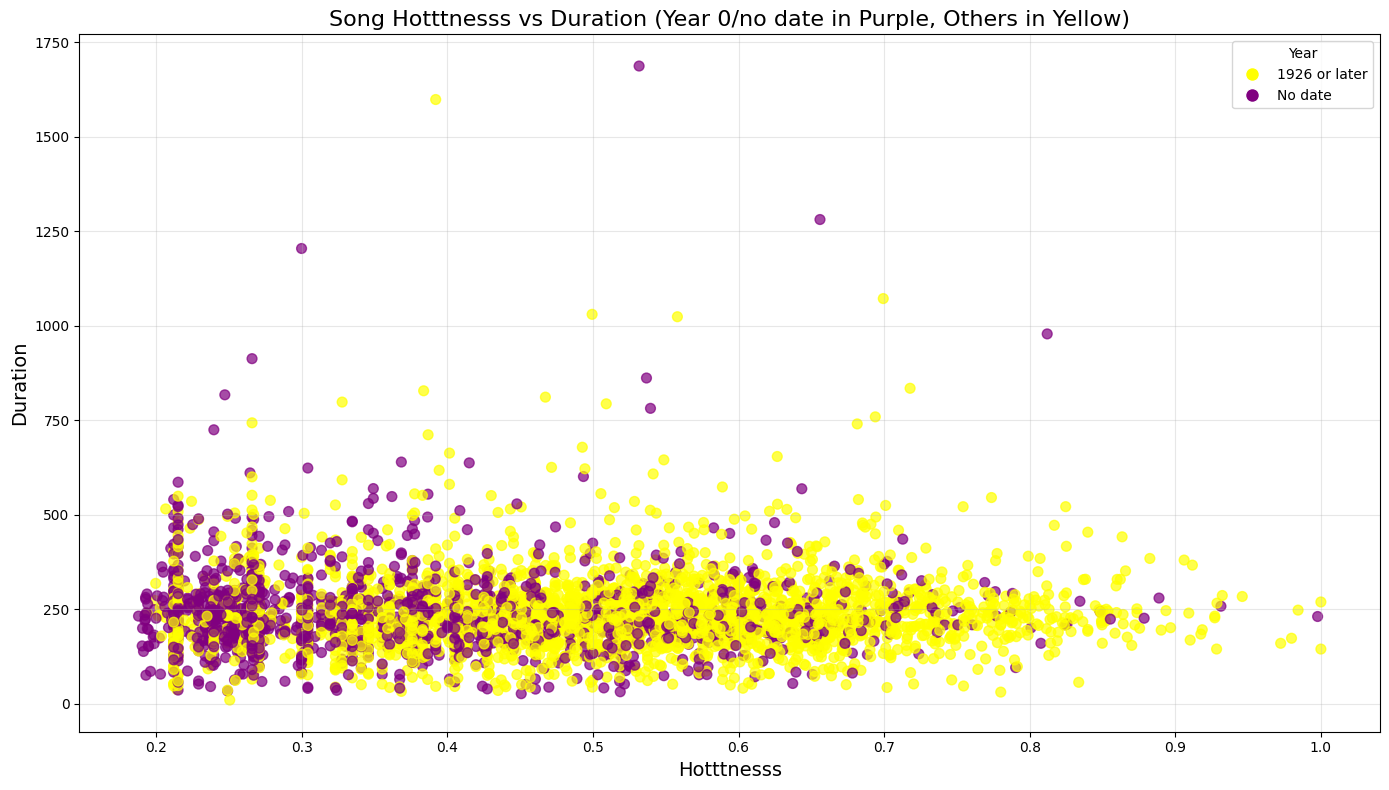

In [59]:
# I am going to see if I can see any hidden correlations or confirm with a visual

# Allow using df[][] notation. Future versions of Pandas might deprecate this.
pd.options.mode.copy_on_write = True

# Only get data that has a duration and hotttness score
filtered_df = df[(df['song.hotttnesss'] > 0) & (df['song.duration'] > 0)]

# Assign colors based on year=0 or not
filtered_df.loc[:, 'color'] = filtered_df['song.year'].apply(
    lambda x: 'purple' if x == 0 else 'yellow'
)

plt.figure(figsize=(14, 8))

# Scatterplot with fixed colors
plt.scatter(
    x=filtered_df['song.hotttnesss'],
    y=filtered_df['song.duration'],
    c=filtered_df['color'],
    alpha=0.7,
    s=50
)

# Add labels and title
plt.title('Song Hotttnesss vs Duration (Year 0/no date in Purple, Others in Yellow)', fontsize=16)
plt.xlabel('Hotttnesss', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.grid(alpha=0.3)

# Add custom legend because we are not using Hue (which would draw automatically)
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='1926 or later'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='No date'),
    ],
    loc='upper right',
    title='Year'
)

plt.tight_layout()
plt.show()


The scatter plot above tells me:
    - The purple dots are songs with a Year of 0; since they seem to mostly evenly distributed, I think it's just random bad data, so we can use `song.year` for analysis when it is >0
    - The hotttness definitely is correlated to a shorter song duration: fewer yellow dots above ~400 with > .9 hotttness

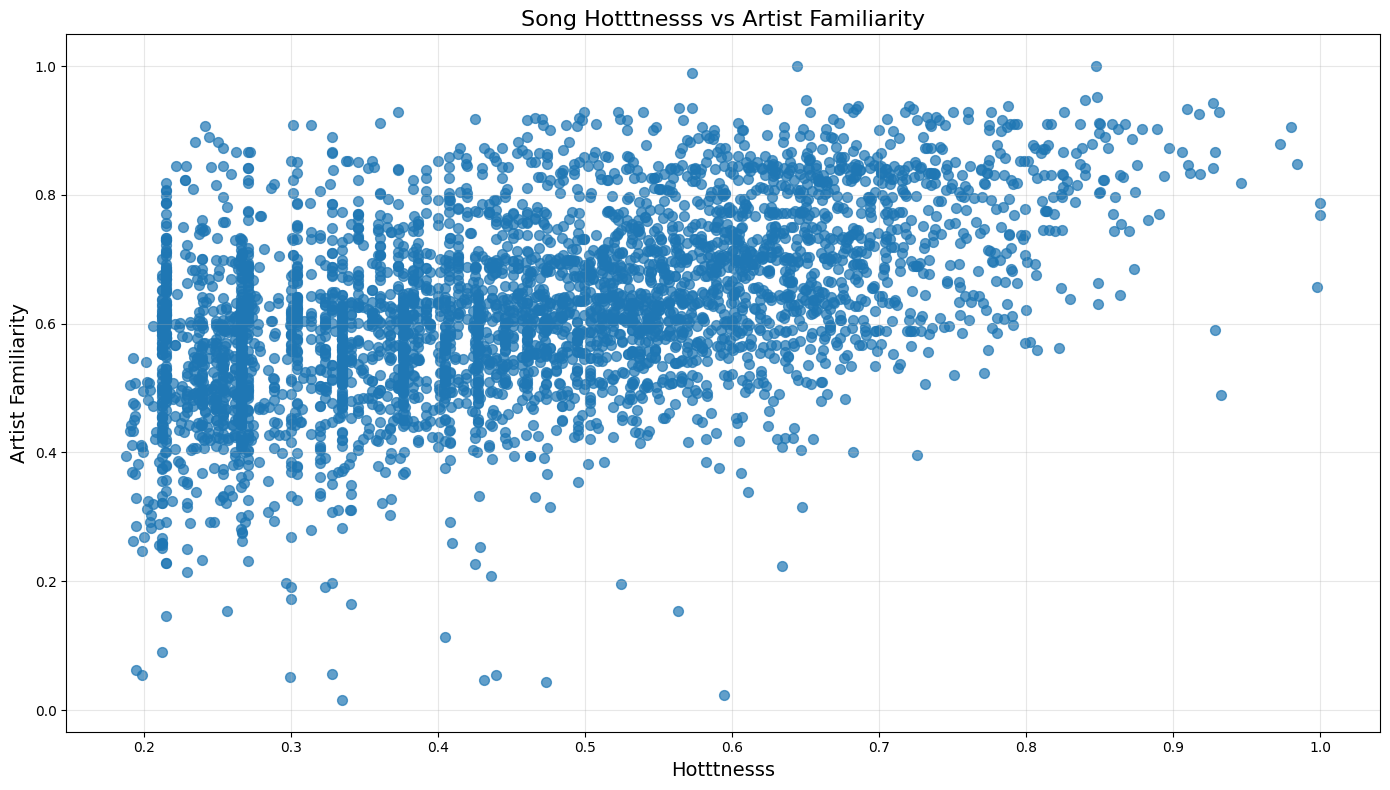

In [57]:
# Can we draw any inferences between Hotttness and Artist Familiarity?
# I am going to see if I can see any hidden correlations or confirm with a visual

# Only get data that has a duration and hotttness score
filtered_df = df[(df['song.hotttnesss'] > 0) & (df['artist.familiarity'] > 0)]

plt.figure(figsize=(14, 8))

# Scatterplot with fixed color
plt.scatter(
    x=filtered_df['song.hotttnesss'],
    y=filtered_df['artist.familiarity'],
    alpha=0.7,
    s=50
)

# Add labels and title
plt.title('Song Hotttnesss vs Artist Familiarity', fontsize=16)
plt.xlabel('Hotttnesss', fontsize=14)
plt.ylabel('Artist Familiarity', fontsize=14)
plt.grid(alpha=0.3)

# Remove legend
plt.gca().legend_ = None

plt.tight_layout()
plt.show()

This shows us that most of the very hottt songs belong to artists that the listener is familiar with.<p>
    We don't see any dots in the lower right quadrant (that would mean low familiarity with high hotttness).